In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Initialising the CNN
classifier = Sequential()
# Step1 - Convolution
classifier.add(Convolution2D(64, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# Step2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
# Adding a second convolution layer
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
# step3 - Flattening
classifier.add(Flatten())
# Step4 - Full COnnection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Instant files /data/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Instant files /data/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2646 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


Epoch 1/10
 83/500 [===>..........................] - ETA: 1:34:15 - loss: 0.6165 - accuracy: 0.6523

500/500 [==============================] - 1464s 3s/step - loss: 0.6165 - accuracy: 0.6523 - val_loss: 0.5716 - val_accuracy: 0.6455


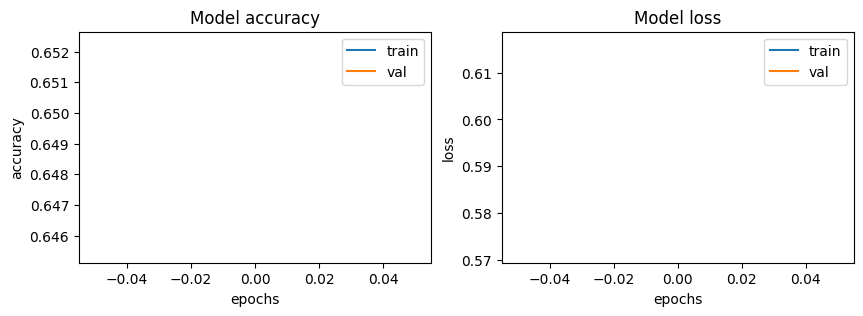

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
hist = classifier.fit_generator(training_set, steps_per_epoch=500, epochs=10, validation_data=test_set, validation_steps=200)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.show()

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
# Verifing our Model by giving samples of cell to detect
test_image = image.load_img('/content/drive/MyDrive/Instant files /data/test/benign/1.jpg', target_size = (64,64))
test_image = image.img_to_array (test_image)
test_image = np.expand_dims (test_image, axis = 0)
result = classifier.predict(test_image)
print (training_set.class_indices)
if result [0][0] == 0:
    prediction = 'benign'
else:
    prediction = 'malignant'
print ("The prediction result is :", prediction)

test_image = image.load_img('/content/drive/MyDrive/Instant files /data/test/malignant/1.jpg', target_size = (64,64))
test_image = image.img_to_array (test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print (training_set.class_indices)
if result[0][0] == 0:
    prediction = 'benign'
else:
    prediction = 'malignant'
print ("The prediction result is :", prediction)

1/1 [==============================] - 0s 180ms/step
{'benign': 0, 'malignant': 1}
The prediction result is : benign
1/1 [==============================] - 0s 48ms/step
{'benign': 0, 'malignant': 1}
The prediction result is : malignant


In [16]:
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
print(classifier.output_shape)  # Output shape: (None, 62, 62, 32)
classifier.add(MaxPooling2D(pool_size=(2,2)))
print(classifier.output_shape)  # Output shape: (None, 31, 31, 32)
classifier.add(Flatten())
print(classifier.output_shape)  # Output shape: (None, 30912)
classifier.add(Dense(units = 128, activation = 'relu'))
print(classifier.output_shape)  # Output shape: (None, 128)
classifier.add(Dense(units = 1, activation = 'sigmoid'))
print(classifier.output_shape)  # Output shape: (None, 1)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist = classifier.fit_generator(training_set, steps_per_epoch=1000, epochs=25, validation_data=test_set, validation_steps=400)

(None, 21, 21, 32)
(None, 10, 10, 32)
(None, 3200)
(None, 128)
(None, 1)
Epoch 1/25
  83/1000 [=>............................] - ETA: 3:09 - loss: 0.5627 - accuracy: 0.6935

1000/1000 [==============================] - 24s 23ms/step - loss: 0.5627 - accuracy: 0.6935 - val_loss: 0.4634 - val_accuracy: 0.7864


In [14]:
# dataset links:
#https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign
#https://www.kaggle.com/code/fanconic/cnn-for-skin-cancer-detection
#https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000